# Visualizing Chipotle's Data

### Step 1. Import the necessary libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [78]:
data_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

### Step 3. Assign it to a variable called chipo.

In [79]:
chipo = pd.read_csv(data_url, sep = '\t') 
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [80]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Text(0.5, 1.0, 'Top 5 items bought')

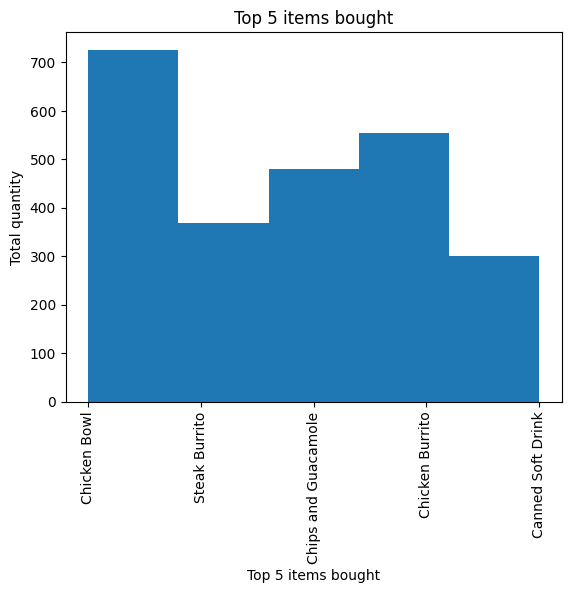

In [81]:
top_five_items = chipo.groupby("item_name")["quantity"].sum().sort_values(ascending=False).head(5)
ans = chipo[chipo["item_name"].isin(top_five_items.index)]
plt.hist(ans["item_name"], bins=5 )
plt.xticks(rotation=90)
plt.xlabel("Top 5 items bought")
plt.ylabel("Total quantity")
plt.title("Top 5 items bought")

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0.5, 1.0, 'Number of items ordered per order price')

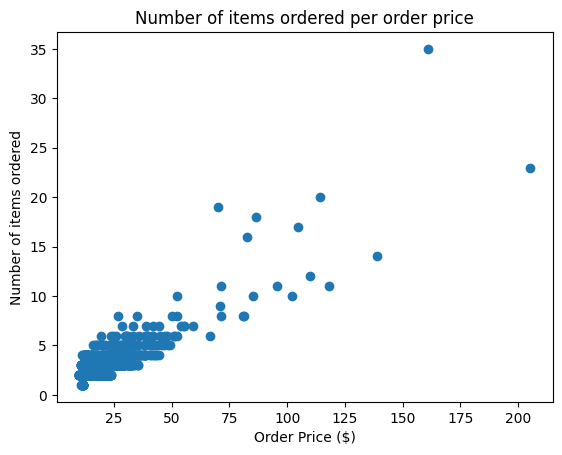

In [90]:
chipo['item_price'] = chipo["item_price"].apply(lambda x: float(x[1:].strip()))
orders = chipo.groupby('order_id').aggregate({'quantity': "sum", 'item_price':'sum'})

plt.scatter(orders['item_price'], orders['quantity'].values)
plt.xlabel("Order Price ($)")
plt.ylabel("Number of items ordered")
plt.title("Number of items ordered per order price")

### Step 7. BONUS: Create a question and a graph to answer your own question.

#### Create a graph to show the relationship between the price of the item and the number of times it was ordered. Show this relationship using a linear regression graph. Make sure to show it with a graph

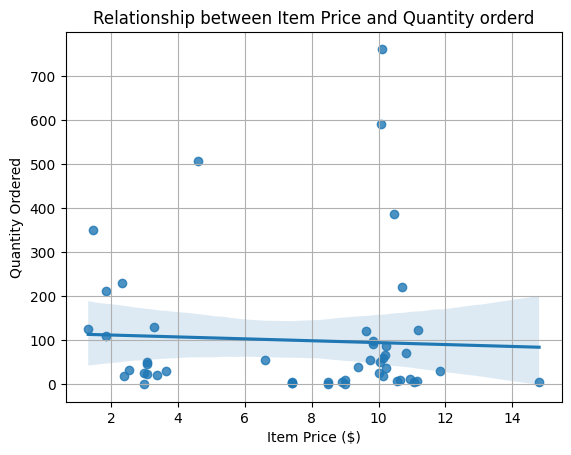

In [92]:
items = chipo.groupby('item_name').aggregate({'quantity':'sum', 'item_price': 'mean'})
sns.regplot(x='item_price', y='quantity', data=items)
plt.xlabel("Item Price ($)")
plt.ylabel("Quantity Ordered")
plt.title("Relationship between Item Price and Quantity orderd")
plt.grid(True)